###Initial things

In [28]:
#importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn import preprocessing
from sklearn import svm
from sklearn import ensemble
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier

In [29]:
dataset = pd.read_csv("creditcard.csv")
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<AxesSubplot:ylabel='Class'>

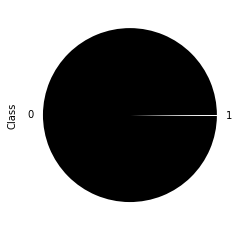

In [30]:
# showing that this dataset is totally unbalanced
count_classes = pd.value_counts(dataset['Class'])
count_classes.plot.pie(colors = ['black', 'white'])

In [31]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [32]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

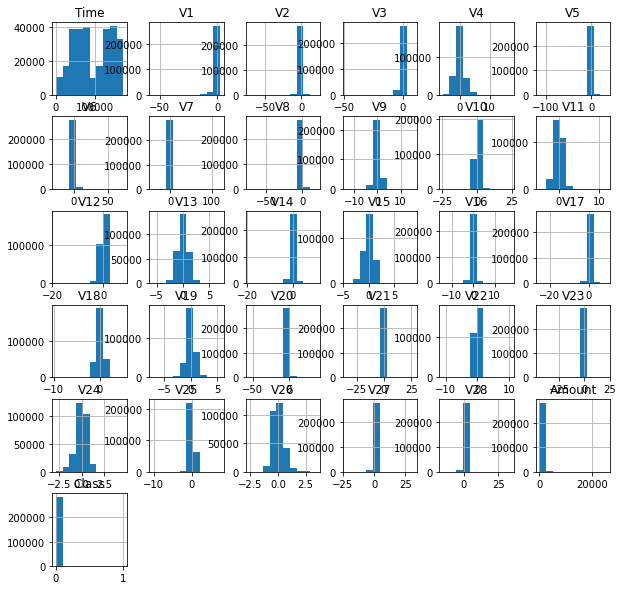

In [33]:
dataset.hist(figsize=(10, 10));

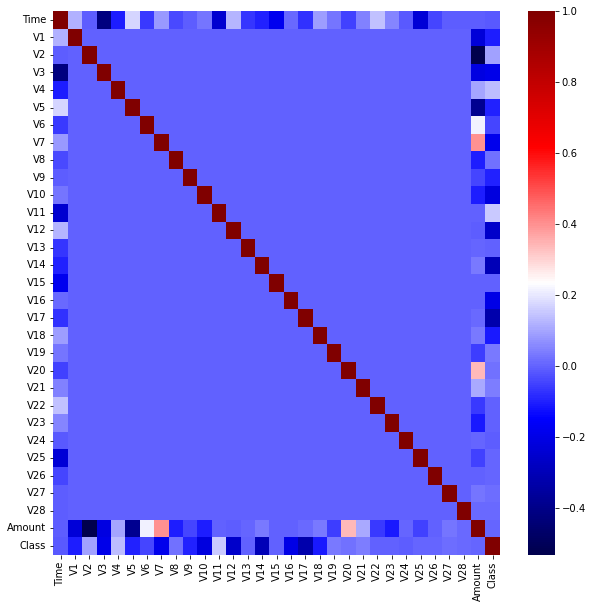

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(), cmap="seismic")
plt.show();

In [35]:
# separating the data for analysis
legit = dataset[dataset.Class == 0]
fraud = dataset[dataset.Class == 1]
print("Fraud ", fraud.shape)

Fraud  (492, 31)


In [36]:
scores = []

In [37]:
names = ["LR", "RF", "XGBoost", "Ada Boost", "SGD", "NN(Supervised)", "DT", "GNB", "GB", "KNN", "VC", "SVM"]

In [38]:
preci = []
recall = []
f1 = []

### **Logistic** **Regression**

In [39]:
#!pip install imbalanced-learn
import imblearn
from imblearn.over_sampling import ADASYN

In [40]:
X = np.asarray(dataset.drop(columns='Class', axis = 1))
y = np.asarray(dataset['Class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=30)

In [41]:
ada = ADASYN(sampling_strategy=1.0, random_state=30)
X_train, y_train = ada.fit_resample(X_train, y_train)

In [42]:
from collections import Counter
print('over sampled dataset shape %s' % Counter(y_train))

over sampled dataset shape Counter({1: 227481, 0: 227451})


In [43]:
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [44]:
#X_df = pd.DataFrame(y_train)
#X_df

In [45]:
# import time

# start_time = time.clock()
lr_clf = LogisticRegression(max_iter=300000).fit(X_train, y_train)
# print(time.clock() - start_time, "seconds")


In [46]:
# accuracy on testing data
y_test_pred = lr_clf.predict(X_test)
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9920122186720972


In [47]:
print(confusion_matrix(y_test, y_test_pred))

[[56425   439]
 [   16    82]]


In [48]:
#!pip install mlxtend

In [49]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt


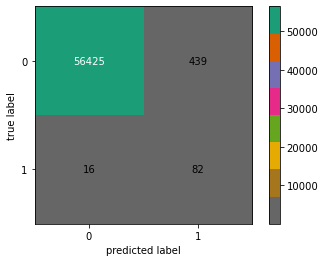

In [50]:
lr_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=lr_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [51]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.84      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.91      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [52]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Random Forest

In [53]:
rf_clf = RandomForestClassifier(n_estimators=300)
rf_clf.fit(X_train, y_train)

y_test_pred = np.array(rf_clf.predict(X_test))

In [54]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9993679997191109


In [55]:
print(confusion_matrix(y_test, y_test_pred))

[[56851    13]
 [   23    75]]


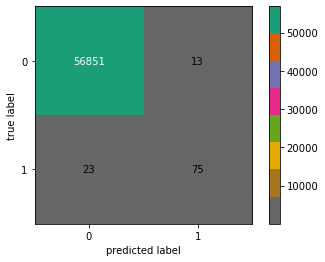

In [56]:
rf_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=rf_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [57]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.77      0.81        98

    accuracy                           1.00     56962
   macro avg       0.93      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [58]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Extreme Gradient Boosting (XGBoost)

In [59]:
xgb_clf = XGBClassifier(n_estimators=300, use_label_encoder=False)
xgb_clf.fit(X_train, y_train, eval_metric='aucpr')

y_test_pred = xgb_clf.predict(X_test)

In [60]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.999385555282469


In [61]:
print(confusion_matrix(y_test, y_test_pred))

[[56850    14]
 [   21    77]]


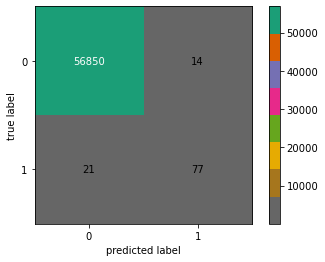

In [62]:
xgb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=xgb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [63]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.79      0.81        98

    accuracy                           1.00     56962
   macro avg       0.92      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [64]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Ada Boost

In [65]:
print('over sampled dataset shape %s' % Counter(y_train))

over sampled dataset shape Counter({1: 227481, 0: 227451})


In [66]:
from sklearn import ensemble
# Creating classifier Object
adaboost_clf = ensemble.AdaBoostClassifier(n_estimators=300).fit(X_train, y_train)

In [67]:
y_test_pred = adaboost_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9963484428215301


In [68]:
print(confusion_matrix(y_test, y_test_pred))

[[56673   191]
 [   17    81]]


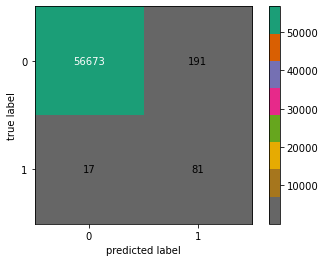

In [69]:
ab_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=ab_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [70]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.83      0.44        98

    accuracy                           1.00     56962
   macro avg       0.65      0.91      0.72     56962
weighted avg       1.00      1.00      1.00     56962



In [71]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Stochastic gradient descent

In [72]:
from sklearn.linear_model import SGDClassifier

In [73]:
sgd_clf = SGDClassifier(loss="log", penalty="l2", max_iter=3000000).fit(X_train, y_train)

In [74]:
y_test_pred = sgd_clf.predict(X_test)

In [75]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9922228854323936


In [76]:
print(confusion_matrix(y_test, y_test_pred))

[[56436   428]
 [   15    83]]


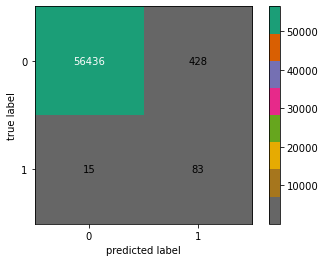

In [77]:
sgd_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=sgd_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [78]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.85      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.92      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [79]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Neural network models (supervised)

In [80]:
from sklearn.neural_network import MLPClassifier

In [81]:
print('over sampled dataset shape %s' % Counter(y_train))

over sampled dataset shape Counter({1: 227481, 0: 227451})


In [82]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm= norm.transform(X_test)

In [83]:
nn_clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes = (50,5), random_state = 1, max_iter=300000)
nn_clf = nn_clf.fit(X_train_norm, y_train)

In [84]:
y_test_pred = nn_clf.predict(X_test_norm)

In [85]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9945577753590112


In [86]:
print(confusion_matrix(y_test, y_test_pred))

[[56573   291]
 [   19    79]]


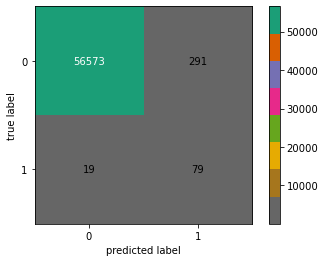

In [87]:
nn_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=nn_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [88]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.21      0.81      0.34        98

    accuracy                           0.99     56962
   macro avg       0.61      0.90      0.67     56962
weighted avg       1.00      0.99      1.00     56962



In [89]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Decision Trees

In [90]:
from sklearn.tree import DecisionTreeClassifier

In [91]:
dt_clf = DecisionTreeClassifier(max_depth = 3, min_samples_split= 3, min_samples_leaf = 1, random_state=30)
dt_clf = dt_clf.fit(X_train, y_train)

In [92]:
y_test_pred = dt_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9936624416277519


In [93]:
print('over sampled dataset shape %s' % Counter(y_train))

over sampled dataset shape Counter({1: 227481, 0: 227451})


In [94]:
print(confusion_matrix(y_test, y_test_pred))

[[56520   344]
 [   17    81]]


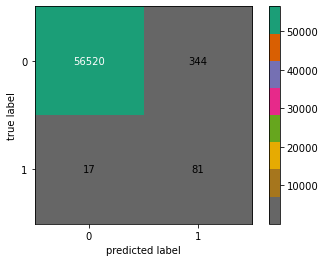

In [95]:
dt_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=dt_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [96]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.19      0.83      0.31        98

    accuracy                           0.99     56962
   macro avg       0.60      0.91      0.65     56962
weighted avg       1.00      0.99      1.00     56962



In [97]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Gaussian Naive Bayes

In [98]:
from sklearn.naive_bayes import GaussianNB

In [99]:
gnb_clf = GaussianNB().fit(X_train, y_train)

In [100]:
y_test_pred = gnb_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9766511007338226


In [101]:
print(confusion_matrix(y_test, y_test_pred))

[[55552  1312]
 [   18    80]]


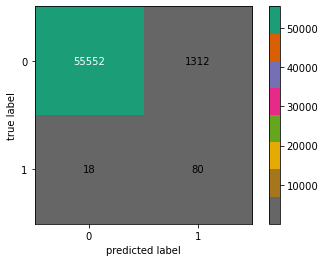

In [102]:
gnb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=gnb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [103]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.82      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.90      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [104]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Gradient Boosting

In [105]:
from sklearn.ensemble import GradientBoostingClassifier

In [106]:
gb_clf = GradientBoostingClassifier(n_estimators=300, learning_rate=1.0, max_depth=1, random_state=0)
gb_clf = gb_clf.fit(X_train, y_train)

In [107]:
y_test_pred = gb_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9956988869772831


In [108]:
print(confusion_matrix(y_test, y_test_pred))

[[56637   227]
 [   18    80]]


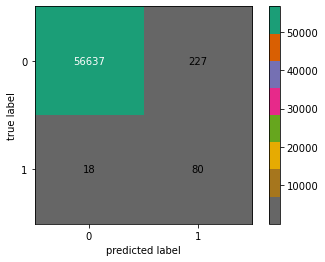

In [109]:
gb_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=gb_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [110]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.26      0.82      0.40        98

    accuracy                           1.00     56962
   macro avg       0.63      0.91      0.70     56962
weighted avg       1.00      1.00      1.00     56962



In [111]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

### K-Nearest Neighbors(KNN)

In [112]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
print('over sampled dataset shape %s' % Counter(y_train))

over sampled dataset shape Counter({1: 227481, 0: 227451})


In [114]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf = knn_clf.fit(X_train_norm, y_train)

In [115]:
y_test_pred = knn_clf.predict(X_test_norm)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9988062216916541


In [116]:
print(confusion_matrix(y_test, y_test_pred))

[[56817    47]
 [   21    77]]


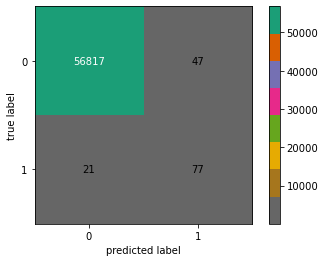

In [117]:
knn_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=knn_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [118]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.62      0.79      0.69        98

    accuracy                           1.00     56962
   macro avg       0.81      0.89      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [119]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

In [120]:
from sklearn.metrics import precision_recall_fscore_support

###Voting Classifier

In [121]:
from sklearn.ensemble import VotingClassifier

In [122]:
labels = ["Multi-layer Perceptron", "XGBoost", "Random Forest"]

In [123]:
from sklearn.ensemble import VotingClassifier

In [124]:
voting_clf = VotingClassifier (estimators = [('nn', nn_clf),('xgboost', xgb_clf), ('RF', rf_clf) ],
voting='soft')
    
voting_clf.fit(X_train,y_train)

[13:25:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('nn',
                              MLPClassifier(alpha=1e-05,
                                            hidden_layer_sizes=(50, 5),
                                            max_iter=300000, random_state=1,
                                            solver='lbfgs')),
                             ('xgboost',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_...
                                            max_delta_step=0, max_depth=6,
                        

In [125]:
y_test_pred = voting_clf.predict(X_test)

testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9993328885923949


In [126]:
print(confusion_matrix(y_test, y_test_pred))

[[56848    16]
 [   22    76]]


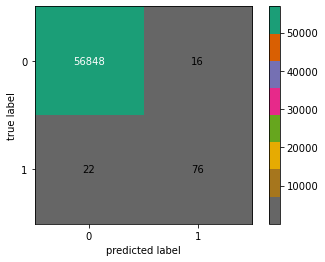

In [127]:
voting_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=voting_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [128]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.78      0.80        98

    accuracy                           1.00     56962
   macro avg       0.91      0.89      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [129]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

###Support vector machine(SVM)

In [130]:
from sklearn.svm import LinearSVC

In [131]:
print('over sampled dataset shape %s' % Counter(y_train))

over sampled dataset shape Counter({1: 227481, 0: 227451})


In [132]:
svm_clf = svm.SVC(kernel='linear', gamma = 'auto', C = 2, probability=True).fit(X_train, y_train)

In [133]:
y_test_pred = svm_clf.predict(X_test)

In [134]:
testing_data_accuracy = accuracy_score(y_test, y_test_pred)
scores.append(testing_data_accuracy)
print('Accuracy on Testing data: ', testing_data_accuracy)

Accuracy on Testing data:  0.9930655524735789


In [135]:
print(confusion_matrix(y_test, y_test_pred))

[[56485   379]
 [   16    82]]


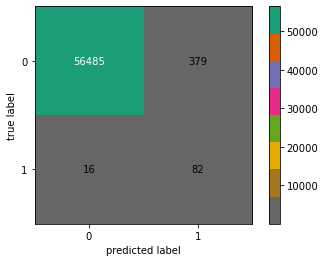

In [136]:
rf_cmat = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(conf_mat=rf_cmat, cmap='Dark2_r', colorbar=True)
plt.show()

In [137]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.84      0.29        98

    accuracy                           0.99     56962
   macro avg       0.59      0.92      0.64     56962
weighted avg       1.00      0.99      1.00     56962



In [138]:
preci.append(precision_score(y_test, y_test_pred, average='macro'))
recall.append(recall_score(y_test, y_test_pred, average='macro'))
f1.append(f1_score(y_test, y_test_pred, average='macro'))

### Result

In [139]:
scores = [round(x*100, 2)  for x in scores]
preci = [round(x*100, 2)  for x in preci]
recall = [round(x*100, 2)  for x in recall]
f1 = [round(x*100, 2)  for x in f1]

In [140]:
df = pd.DataFrame()
df['Classifier Name'] = names
df['Accuracy Score'] = scores
cm = sns.light_palette("purple", as_cmap=True)
s = df.style.background_gradient(cmap=cm)
s

,Classifier Name,Accuracy Score
0,LR,99.200000
1,RF,99.940000
2,XGBoost,99.940000
3,Ada Boost,99.630000
4,SGD,99.220000
5,NN(Supervised),99.460000
6,DT,99.370000
7,GNB,97.670000
8,GB,99.570000
9,KNN,99.880000


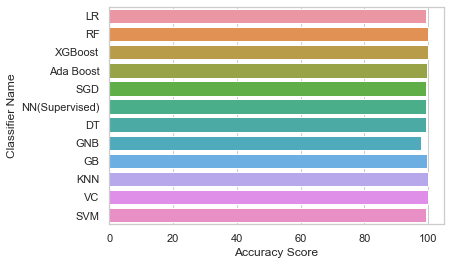

In [141]:
sns.set(style="whitegrid")
ax = sns.barplot(y="Classifier Name", x="Accuracy Score", data = df)

###ROC Curve

In [142]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_clf.predict_proba(X_test)
rf_probs = rf_clf.predict_proba(X_test)
xgb_probs = xgb_clf.predict_proba(X_test)
svm_probs = svm_clf.predict_proba(X_test)
adaboost_probs = adaboost_clf.predict_proba(X_test)
sgd_probs = sgd_clf.predict_proba(X_test)
nn_probs = nn_clf.predict_proba(X_test)
dt_probs = dt_clf.predict_proba(X_test)
gnb_probs = gnb_clf.predict_proba(X_test)
gb_probs = gb_clf.predict_proba(X_test)
knn_probs = knn_clf.predict_proba(X_test)
voting_probs = voting_clf.predict_proba(X_test)

In [143]:
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
xgb_probs = xgb_probs[:, 1]
svm_probs = svm_probs[:, 1]
adaboost_probs = adaboost_probs[:, 1]
sgd_probs = sgd_probs[:, 1]
nn_probs = nn_probs[:, 1]
dt_probs = dt_probs[:, 1]
gnb_probs = gnb_probs[:, 1]
gb_probs = gb_probs[:, 1]
knn_probs = knn_probs[:, 1]
voting_probs = voting_probs[:, 1]

In [144]:
from sklearn.metrics import roc_curve, roc_auc_score

In [145]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)
adaboost_auc = roc_auc_score(y_test, adaboost_probs)
sgd_auc = roc_auc_score(y_test, sgd_probs)
nn_auc = roc_auc_score(y_test, nn_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gnb_auc = roc_auc_score(y_test, gnb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
knn_auc = roc_auc_score(y_test, knn_probs)
voting_auc = roc_auc_score(y_test, voting_probs)


In [146]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (gnb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.964
Naive Bayes: AUROC = 0.953


In [147]:
type(lr_probs)

numpy.ndarray

In [148]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
adaboost_fpr, adaboost_tpr, _ = roc_curve(y_test, adaboost_probs)
sgd_fpr, sgd_tpr, _ = roc_curve(y_test, sgd_probs)
nn_fpr, nn_tpr, _ = roc_curve(y_test, nn_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_test, gnb_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
voting_fpr, voting_tpr, _ = roc_curve(y_test, voting_probs)

In [149]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

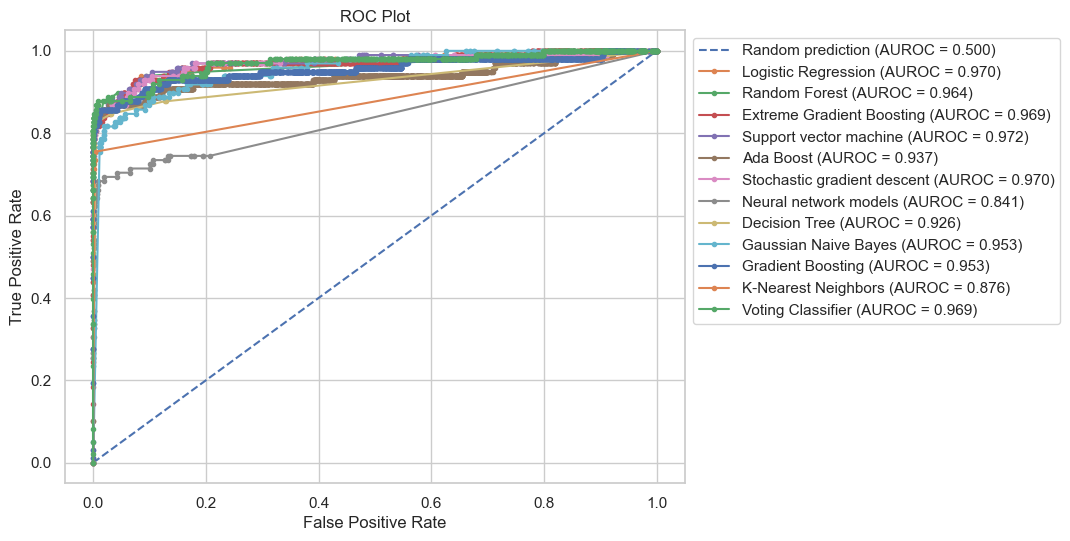

In [150]:
figure(figsize=(8, 6), dpi=100)
plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='Extreme Gradient Boosting (AUROC = %0.3f)' % xgb_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='Support vector machine (AUROC = %0.3f)' % svm_auc)
plt.plot(adaboost_fpr, adaboost_tpr, marker='.', label='Ada Boost (AUROC = %0.3f)' % adaboost_auc)
plt.plot(sgd_fpr, sgd_tpr, marker='.', label='Stochastic gradient descent (AUROC = %0.3f)' % sgd_auc)
plt.plot(nn_fpr, nn_tpr, marker='.', label='Neural network models (AUROC = %0.3f)' % nn_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dt_auc)
plt.plot(gnb_fpr, gnb_tpr, marker='.', label='Gaussian Naive Bayes (AUROC = %0.3f)' % gnb_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='Gradient Boosting (AUROC = %0.3f)' % gb_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='K-Nearest Neighbors (AUROC = %0.3f)' % knn_auc)
plt.plot(voting_fpr, voting_tpr, marker='.', label='Voting Classifier (AUROC = %0.3f)' % voting_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend(bbox_to_anchor=(1,1), loc="upper left") # 
# Show plot
plt.show()

###Precision Recall f1 score

In [151]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

In [152]:
x = np.arange(len(names))
width = 0.35

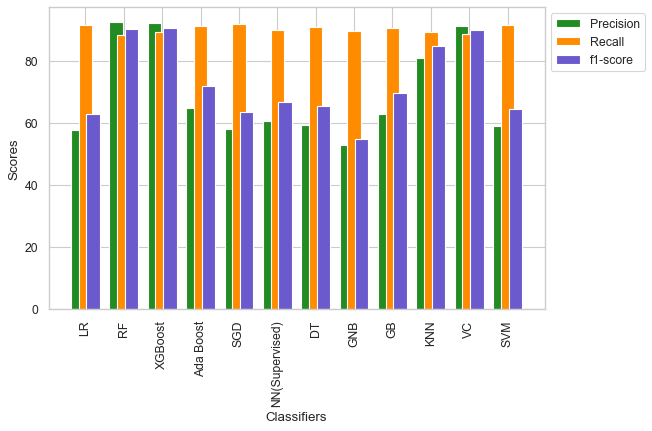

In [153]:
plt.figure(figsize=(8,5), dpi=80)
plt.bar(x-0.2, preci, width, color='forestgreen')
plt.bar(x, recall, width, color='darkorange')
plt.bar(x+0.2, f1, width, color='slateblue')
plt.xticks(x, names, rotation=90)
plt.xlabel("Classifiers")
plt.ylabel("Scores")
plt.legend(["Precision", "Recall", "f1-score"], bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In [154]:
import pandas as pd
from zipfile import ZipFile as zip
res_df = pd.DataFrame(np.column_stack([names, scores, preci, recall, f1]), columns =['Classifier', 'Accuracy Score', 'Precision', 'Recall', 'F1-score'])

In [155]:
res_df

,Classifier,Accuracy Score,Precision,Recall,F1-score
0,LR,99.2,57.86,91.45,63.05
1,RF,99.94,92.59,88.25,90.31
2,XGBoost,99.94,92.29,89.27,90.73
3,Ada Boost,99.63,64.87,91.16,71.8
4,SGD,99.22,58.11,91.97,63.43
5,NN(Supervised),99.46,60.66,90.05,66.74
6,DT,99.37,59.51,91.02,65.33
7,GNB,97.67,52.86,89.66,54.78
8,GB,99.57,63.01,90.62,69.65
9,KNN,99.88,81.03,89.24,84.65
